<a href="https://colab.research.google.com/github/Akanksha2622/Fractal-Dimension-for-Cancer-Detection/blob/main/Box_counting_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


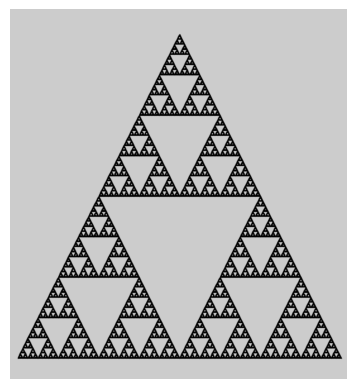

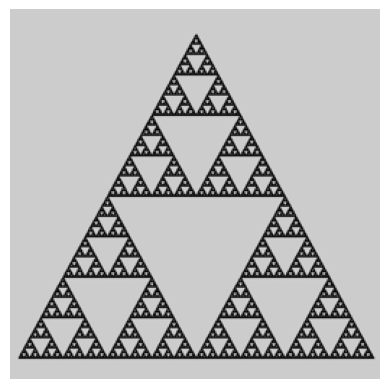

[200132, 55958, 10614, 1967, 346, 64, 12]
[  2   4   8  16  32  64 128]
[4.85203026 4.15888308 3.4657359  2.77258872 2.07944154 1.38629436
 0.69314718]
[12.20673243 10.93235669  9.26992916  7.58426482  5.84643878  4.15888308
  2.48490665]
Fractal Dimension =  2.3771448457077304


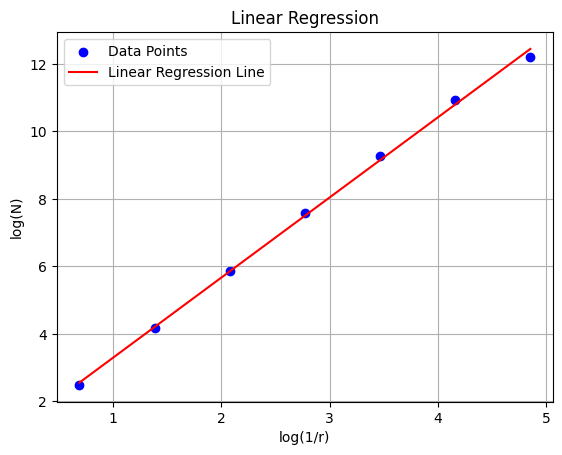

In [ ]:
from PIL import Image
import sys
import numpy as np
import matplotlib.pyplot as plt
import math

np.set_printoptions(threshold=sys.maxsize)

def open_image_without_rotation(image_path):
    img = Image.open(image_path)
    if hasattr(img, '_getexif'):  # Check if the image has EXIF metadata
        exif = img._getexif()
        if exif is not None:
            orientation = exif.get(0x0112)
            if orientation == 3:
                img = img.transpose(Image.ROTATE_180)
            elif orientation == 6:
                img = img.transpose(Image.ROTATE_270)
            elif orientation == 8:
                img = img.transpose(Image.ROTATE_90)
    return img


def linear_regression(x, y):
    n = len(x)
    xsum = np.sum(x)
    ysum = np.sum(y)
    x2sum = np.sum(x**2)
    xysum = np.sum(x * y)
    a = (n * xysum - xsum * ysum) / (n * x2sum - xsum * xsum)  # slope
    b = (x2sum * ysum - xsum * xysum) / (n * x2sum - xsum * xsum)  # intercept
    return a, b


def resize_and_convert_to_grayscale_matrix(image_path, new_size=(256, 256)):
    #img = Image.open(image_path)
    img = open_image_without_rotation(image_path)
    img_resized = img.resize(new_size)

    plt.imshow(img_resized)
    plt.axis('off')
    plt.show()

    img_grayscale = img_resized.convert('L')  # Convert to grayscale
    grayscale_matrix = np.array(img_grayscale)  # Convert image to NumPy array

    return grayscale_matrix

def box_counting(size_of_matrix, mat, num_of_boxes, size_array):
    size_of_grid = 2
    check = size_of_matrix

    while check > 2:
        ans = 0
        for i in range(0, size_of_matrix, size_of_grid):
            for j in range(0, size_of_matrix, size_of_grid):
                if size_of_grid == 2:
                    maxi_temp = max(mat[i][j], max(mat[i + size_of_grid // 2][j], max(mat[i][j + size_of_grid // 2], mat[i + size_of_grid // 2][j + size_of_grid // 2])));
                    mini_temp = min(mat[i][j], min(mat[i + size_of_grid // 2][j], min(mat[i][j + size_of_grid // 2], mat[i + size_of_grid // 2][j + size_of_grid // 2])));
                    mat[i][j] = maxi_temp
                    mat[i][j + 1] = mini_temp
                    ans += math.ceil(mat[i][j]/size_of_grid) - math.ceil(mat[i][j + 1]/size_of_grid) + 1
                else:
                    maxi_temp = max(mat[i][j], max(mat[i + size_of_grid // 2][j], max(mat[i][j + size_of_grid // 2], mat[i + size_of_grid // 2][j + size_of_grid // 2])))
                    mini_temp = min(mat[i][j + 1], min(mat[i + size_of_grid // 2][j + 1], min(mat[i][j + 1 + size_of_grid // 2], mat[i + size_of_grid // 2][j + 1 + size_of_grid // 2])))
                    mat[i][j] = maxi_temp
                    mat[i][j + 1] = mini_temp
                    ans += math.ceil(mat[i][j]/size_of_grid) - math.ceil(mat[i][j + 1]/size_of_grid) + 1

        num_of_boxes.append(ans)
        size_array.append(size_of_grid)
        size_of_grid *= 2
        check //= 2

# change here

image_path = "/content/drive/MyDrive/Project/Serpinski_triangle.png"
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

binary_matrix = resize_and_convert_to_grayscale_matrix(image_path)
# print(binary_matrix)



num_of_boxes = []
size_array = []
x = []
box_counting(len(binary_matrix), binary_matrix, num_of_boxes, size_array)

print(num_of_boxes)

size_array_filtered = np.array(size_array)[np.array(size_array) != 0]
n = len(size_array)

for size in size_array_filtered:
    x.append(np.log(256 / size))

print(size_array_filtered)
slope, intercept = linear_regression(np.array(x),np.log(num_of_boxes))
x1 = np.array(x)
y1 = np.log(num_of_boxes)
print(x1)
print(y1)
# Plotting
print("Fractal Dimension = ",slope)
plt.scatter(x1, y1, color='blue', label='Data Points')  # Plot the original data points
plt.plot(x1, slope*x1 + intercept, color='red', label='Linear Regression Line')  # Plot the linear regression line
plt.xlabel('log(1/r)')
plt.ylabel('log(N)')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# @title goodness of fit
def goodness_of_fit(y_values, predicted_values):
    """
    function to calculate the R^2 goodness of fit.
    """
    y_mean: float = sum(y_values) / len(y_values)

    tss: float = sum([(y_values[i] - y_mean)**2              for i in range(len(y_values))])
    rss: float = sum([(y_values[i] - predicted_values[i])**2 for i in range(len(y_values))])

    r_squared = 1 - (rss / tss)
    mean_squared_error = rss / len(y_values)
    rms_error = mean_squared_error ** 0.5

    print("R^2 characteristic =  ", r_squared, end='\n\n')
    print("Mean Squared error =  ", mean_squared_error, end='\n\n')
    print("Root Mean Sqaured error =  ", rms_error, end='\n\n')

    return r_squared, mean_squared_error, rms_error

goodness_of_fit(y1, slope*x1 + intercept)

R^2 characteristic =   0.998634625192199

Mean Squared error =   0.01484798326416548

Root Mean Sqaured error =   0.12185230102121782



(np.float64(0.998634625192199),
 np.float64(0.01484798326416548),
 np.float64(0.12185230102121782))